<img src = "bgg_data_visualisation.png" style = "width:800px" align = "left" >

### About BoardGameGeek
[BoardGameGeek](https://boardgamegeek.com/) is an online forum and game database catered towards board gaming hobbyists.

### Table of Contents

* [Maximum Player Counts](#max_player_count)
* [Amount of Games Published Per Year](#published_per_year)

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.lines as lines
import numpy as np

In [3]:
games = pd.read_csv('datasets/games.csv')

### Maximum Player Counts <a class="anchor" id="max_player_count"></a>

In [104]:
players_df = games.groupby('MaxPlayers').count()[['BGGId']].reset_index()

In [105]:
players_df = players_df.rename(columns = {'MaxPlayers':'max_players','BGGId':'game_count'})

In [106]:
thirteen_above_count = players_df[players_df.max_players > 12].sum()['game_count']

In [107]:
players_df = players_df[players_df['max_players'] < 13]

In [111]:
players_df = players_df.append({'max_players':'13+','game_count': thirteen_above_count}, ignore_index = True)


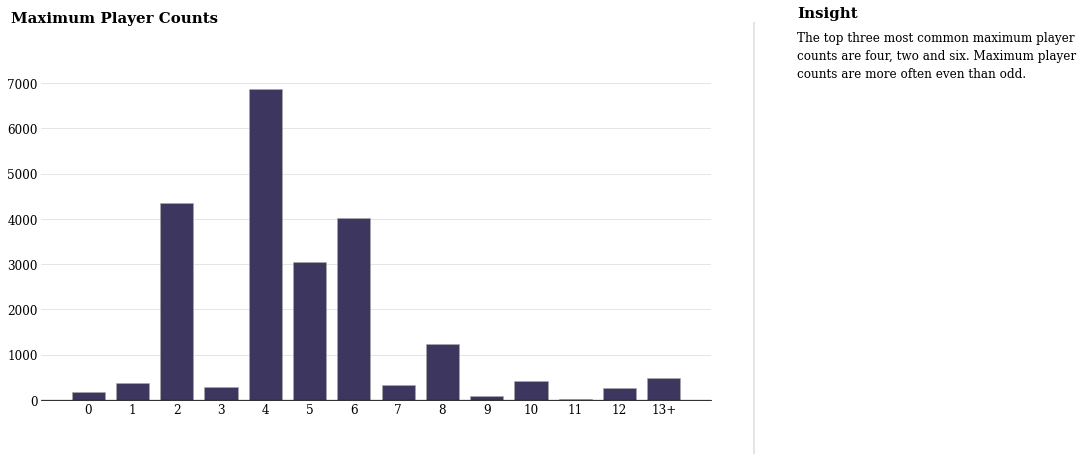

In [124]:
color_map = '#3D3760'

fig, ax = plt.subplots(1,1, figsize=(12, 6))
ax.bar(players_df.index, players_df.game_count, width=0.75, 
       edgecolor='darkgray',
       linewidth=0.6,color=color_map)

for s in ['top', 'left', 'right']:
    ax.spines[s].set_visible(False)
    

fig.text(0.09, 1, 'Maximum Player Counts', fontsize=15, fontweight='bold', fontfamily='serif')
# fig.text(0.09, 0.95, 'The most frequent max player counts have been highlighted.', fontsize=12, fontweight='light', fontfamily='serif')
fig.text(1, 1.01, 'Insight', fontsize=15, fontweight='bold', fontfamily='serif')

fig.text(1, 0.83, '''
The top three most common maximum player 
counts are four, two and six. Maximum player 
counts are more often even than odd.
'''
         , fontsize=12, fontweight='light', fontfamily='serif', linespacing = 1.5)


ax.grid(axis='y', linestyle='-', alpha=0.4)   
grid_y_ticks = np.arange(0, 8000, 1000) # y ticks, min, max, then step
ax.set_yticks(grid_y_ticks)
ax.set_axisbelow(True)

plt.axhline(y = 0, color = 'black', linewidth = 1.3, alpha = .7)

ax.tick_params(axis='both', which='major', labelsize=12)

l1 = lines.Line2D([0.95, 0.95], [0, 1], transform=fig.transFigure, figure=fig, color='black',lw=0.2)
fig.lines.extend([l1])


ax.set_xticks(players_df.index)
ax.set_xticklabels(players_df['max_players'])
plt.xticks(family = 'serif', fontsize = 12)
plt.yticks(family = 'serif', fontsize = 12)

ax.tick_params(axis=u'both', which=u'both',length=0)

plt.show()



## Amount Published Per Year <a class="anchor" id="published_per_year"></a>

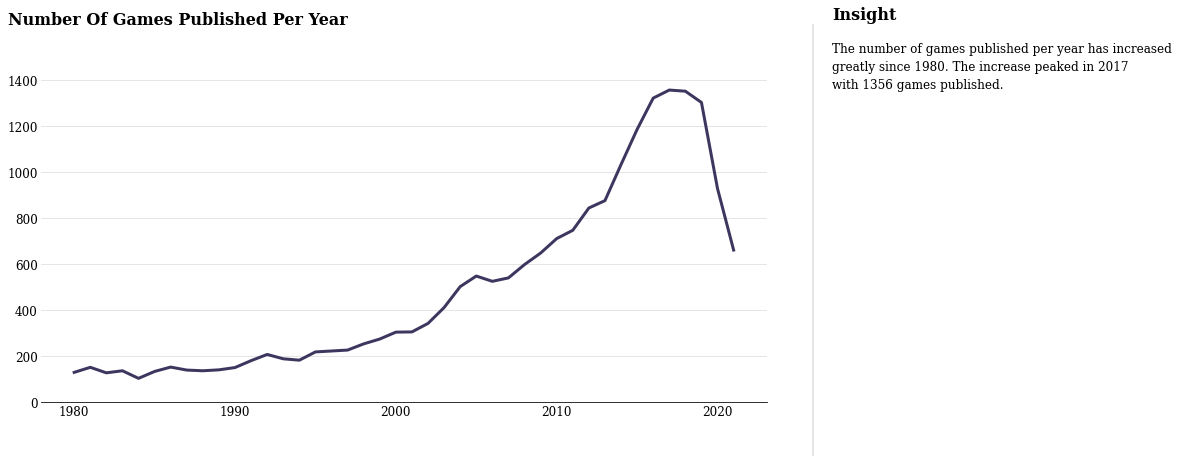

In [14]:
games_since_1980 = games[games['YearPublished'] >= 1980]['YearPublished'].value_counts().sort_index()

color_map = '#3D3760'

fig, ax = plt.subplots(1,1, 
                       figsize= (13, 6))

ax.plot(games_since_1980,
        linewidth=3,
        color=color_map)

for s in ['top', 'left', 'right']:
    ax.spines[s].set_visible(False)
    

fig.text(0.09, 1, 
         'Number Of Games Published Per Year', 
         fontsize=16, 
         fontweight='bold', 
         fontfamily='serif')

ax.grid(axis='y', 
        linestyle='-', 
        alpha=0.4)   
grid_y_ticks = np.arange(0, 1500, 200) # y ticks, min, max, then step
ax.set_yticks(grid_y_ticks)
ax.set_axisbelow(True)


plt.xticks(family = 'serif', 
           fontsize = 12)

plt.yticks(family = 'serif', 
           fontsize = 12)

ax.tick_params(axis=u'both', which=u'both',length=0)

l1 = lines.Line2D([0.95, 0.95], [0, 1], transform=fig.transFigure, figure=fig, color='black',lw=0.2)
fig.lines.extend([l1])
fig.text(0.97, 1.01, 'Insight', fontsize = 16, fontweight = 'bold', fontfamily = 'serif')

fig.text(0.97, 0.85,'''The number of games published per year has increased
greatly since 1980. The increase peaked in 2017 
with 1356 games published.''', linespacing = 1.5, fontsize = 12, fontfamily = 'serif', fontweight = 'light')


plt.show()